# Jupyter Notebook is divided into following sections:

1. Data Description
2. Data Visualization
3. Null Values Analysis
4. Outliers Analysis
5. Binary Classifier
6. Comapring the Results of Algorithms
7. Dealing with Imbalance Data and Model Improvments


In [515]:
#Importing all necessary libraries

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import math
from scipy.stats import norm, skew
from scipy import stats

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Modelling Helpers :
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder


#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.metrics import confusion_matrix, classification_report


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

 # Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}

##### 1. Describe the data with statistical information about each feature.

In [392]:
df = pd.read_csv ("Website_VIP_User_data.csv")

#Column data types and null value information
df.info()

#Printing first 5 rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
IsVIP_500                         10001 non-null int64
payment_7_day                     10001 non-null float64
dau_days                          10001 non-null int64
days_between_install_first_pay    10001 non-null int64
total_txns_7_day                  10001 non-null int64
total_page_views                  10001 non-null int64
total_product_liked               10001 non-null int64
product_like_rate                 10001 non-null object
total_free_coupon_got             10001 non-null int64
total_bonus_xp_points             10001 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB
   IsVIP_500  payment_7_day  dau_days  days_between_install_first_pay  \
0          0          15.98         6                               8   
1          0           8.48         7                             372   
2          0           3.49         7                  

In [393]:
#statistical summary 
df.describe()

,IsVIP_500,payment_7_day,dau_days,days_between_install_first_pay,total_txns_7_day,total_page_views,total_product_liked,total_free_coupon_got,total_bonus_xp_points
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,1.000100e+04
mean,0.015498,21.732978,4.725127,645.522248,3.254975,375.029397,94.568943,6.819018,7.457103e+05
std,0.123530,28.614734,2.193795,867.677542,2.228897,534.204200,156.700696,7.429485,9.371288e+05
min,0.000000,1.510000,1.000000,1.000000,2.000000,-9.000000,-19.000000,0.000000,0.000000e+00
25%,0.000000,7.150000,3.000000,17.000000,2.000000,56.000000,2.000000,2.000000,1.260000e+05
50%,0.000000,11.990000,5.000000,97.000000,3.000000,187.000000,39.000000,6.000000,5.310000e+05
75%,0.000000,22.860000,7.000000,1226.000000,3.000000,478.000000,122.000000,11.000000,1.122000e+06
max,1.000000,208.930000,7.000000,3242.000000,83.000000,7620.000000,2151.000000,331.000000,3.901410e+07


In [394]:
'''From above summmary table we observe that, total page views have minimum value as -9
which is not possible as, page viewed cannot be a negative value.
Hence, need to replace the negative values with mean.'''

'From above summmary table we observe that, total page views have minimum value as -9\nwhich is not possible as, page viewed cannot be a negative value.\nHence, need to replace the negative values with mean.'

In [395]:
#Converting product_like_rate to numeric datatype
df['product_like_rate'] = pd.to_numeric(df.product_like_rate, errors='coerce')

#Replacing null values with 0
df['product_like_rate'] = df['product_like_rate'].fillna(0)


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
IsVIP_500                         10001 non-null int64
payment_7_day                     10001 non-null float64
dau_days                          10001 non-null int64
days_between_install_first_pay    10001 non-null int64
total_txns_7_day                  10001 non-null int64
total_page_views                  10001 non-null int64
total_product_liked               10001 non-null int64
product_like_rate                 10001 non-null float64
total_free_coupon_got             10001 non-null int64
total_bonus_xp_points             10001 non-null int64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


##### 2. Visualization of each feature and the target variable (class distribution).

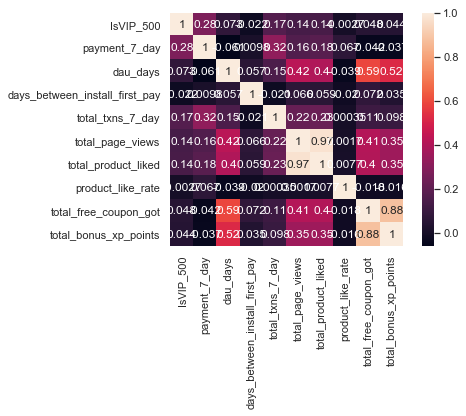

In [397]:
#Finding that if any 2 columns are highly correlated 
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
plt.show()

In [198]:
'''Above plot shows that total_page_views and total_product_liked columns are highly corelated (0.97) . So we can
consider droping one of them.'''

'Above plot shows that total_page_views and total_product_liked columns are highly corelated (0.97) . So we can\nconsider droping one of them.'

In [201]:
#Using group by to get the count of VIP and non VIP customers
IsVIP_group = df.groupby(['IsVIP_500']).size()
print (IsVIP_group)

IsVIP_500
0    9846
1     155
dtype: int64


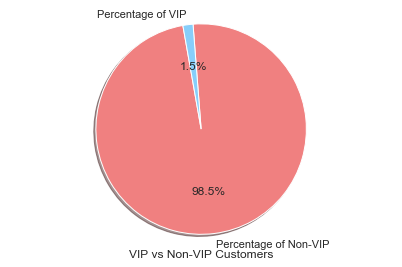

In [202]:
#Plotting Pie Chart for ISVIP_500



# Data to plot
labels = IsVIP_group.index
sizes =  IsVIP_group.values
colors = ['lightcoral', 'lightskyblue', 'lightcoral', 'lightskyblue','gold']

label_nf = ['Percentage of Non-VIP','Percentage of VIP']
plt.pie(sizes, labels=label_nf, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle= 100)
 
plt.axis('equal')
plt.xlabel('VIP vs Non-VIP Customers')
plt.show()

#Analysis: From the below pie chart we can see that only 1.5% of unpaid customers are converting to VIP or Paid customer.

In [203]:

data_group = df.groupby(['IsVIP_500'])
print (data_group)


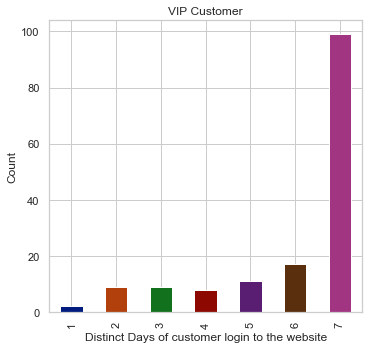

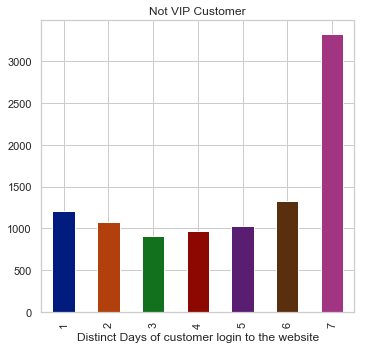

In [215]:
VIP_Customer = df[df['IsVIP_500']==1]
NotVIP_Customer = df[df['IsVIP_500']==0]

#plt.subplot(1, 2, 1)
VIP_Customer['dau_days'].value_counts().sort_index().plot.bar(figsize=(5,5))
plt.title('VIP Customer')
plt.xlabel('Distinct Days of customer login to the website')
plt.ylabel('Count')
plt.show()

#plt.subplot(1, 2, 1)
NotVIP_Customer['dau_days'].value_counts().sort_index().plot.bar(figsize=(5,5))
plt.title('Not VIP Customer')
plt.xlabel('Distinct Days of customer login to the website')
plt.show()

In [293]:
#Creating buckets for column: 'payment_7_day', for better visualization.
break_points = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210]
labels = ['0-11','11-20','21-30','31-40','41-50','51-60', '61-70','71-80','81-90','91-100','101-110','111-120',
          '121-130','131-140','141-150','151-160',
          '161-170','171-180','181-190','191-200']
colBin_VIP = pd.cut(VIP_Customer['payment_7_day'],bins=break_points,labels=labels,include_lowest=True)
colBin_notVIP = pd.cut(NotVIP_Customer['payment_7_day'],bins=break_points,labels=labels,include_lowest=True)
print (colBin.iloc[:10])

204    171-180
266      61-70
333      51-60
417    111-120
421      61-70
436        NaN
479      41-50
511    181-190
562      21-30
748    131-140
Name: payment_7_day, dtype: category
Categories (19, object): [0-10 < 11-20 < 21-30 < 31-40 ... 151-160 < 161-170 < 171-180 < 181-190]


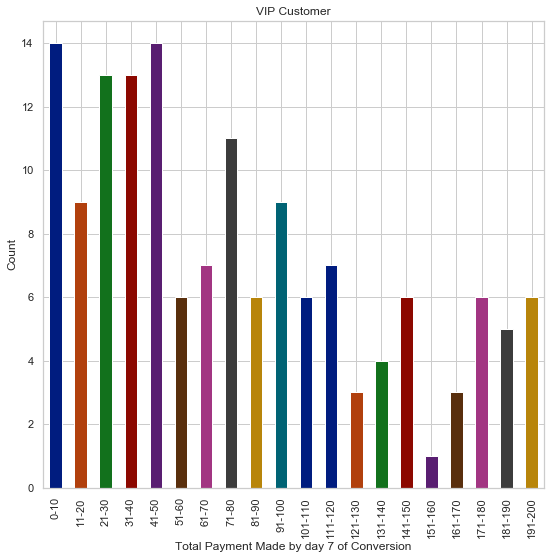

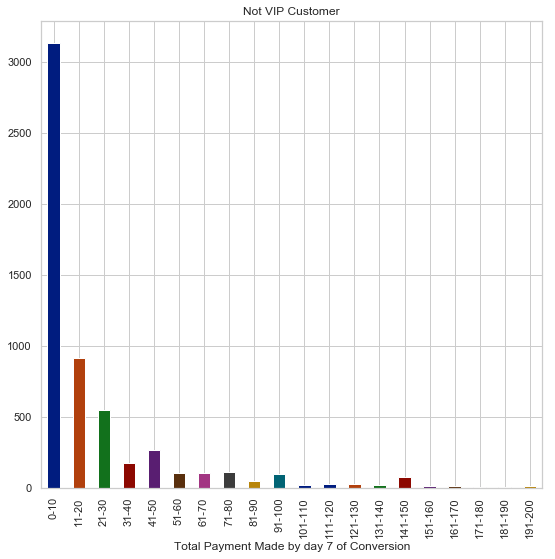

In [218]:



#plt.subplots(2,2,figsize=(15,15))
colBin_VIP.value_counts().sort_index().plot.bar(figsize=(8,8))
plt.title('VIP Customer')
plt.xlabel('Total Payment Made by day 7 of Conversion')
plt.ylabel('Count')
plt.show()

#plt.subplots(2,2,figsize=(15,15))
colBin_notVIP.value_counts().sort_index().plot.bar(figsize=(8,8))
plt.title('Not VIP Customer')
plt.xlabel('Total Payment Made by day 7 of Conversion')
plt.show()

In [281]:
#Creating buckets for column: 'days_between_install_first_pay', for better visualization.

break_points = [500,1000,1500,2000,2500,3000,3500]
labels = ['0-500','501-1000','1001-1500','1501-2000','2001-2500', '2501-3000']
colBin_VIP = pd.cut(VIP_Customer['days_between_install_first_pay'],bins=break_points,labels=labels,include_lowest=True)
colBin_notVIP = pd.cut(NotVIP_Customer['days_between_install_first_pay'],bins=break_points,labels=labels,include_lowest=True)

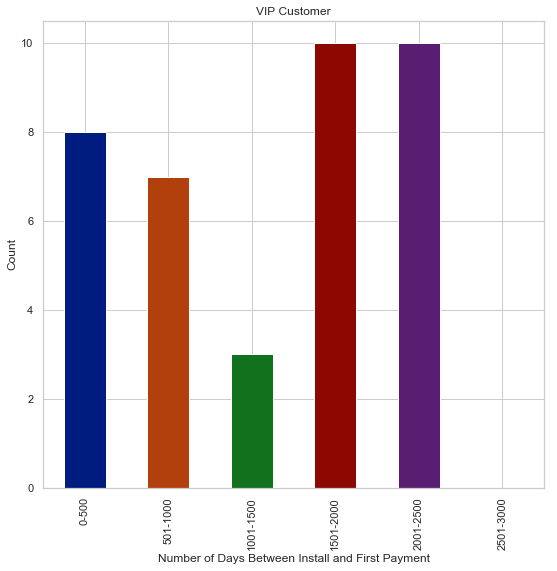

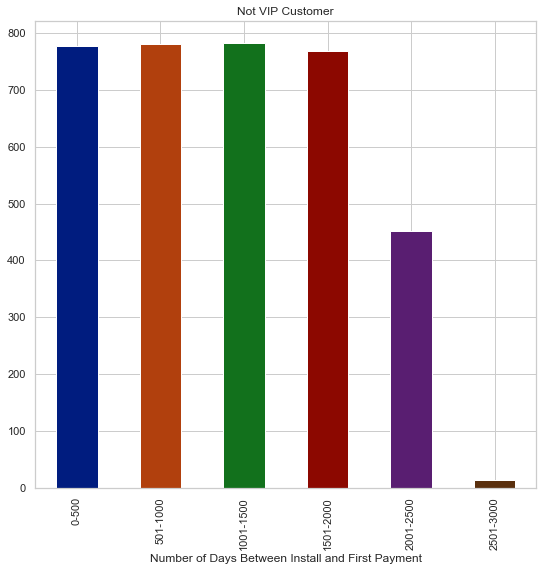

In [282]:
#days_between_install_first_pay by VIP Customers vs Non-VIP Customers

colBin_VIP.value_counts().sort_index().plot.bar(figsize=(8,8))
plt.title('VIP Customer')
plt.xlabel('Number of Days Between Install and First Payment')
plt.ylabel('Count')
plt.show()

#plt.subplots(2,2,figsize=(15,15))
colBin_notVIP.value_counts().sort_index().plot.bar(figsize=(8,8))
plt.title('Not VIP Customer')
plt.xlabel('Number of Days Between Install and First Payment')
plt.show()

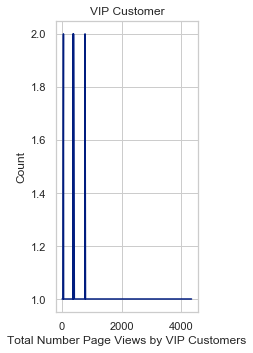

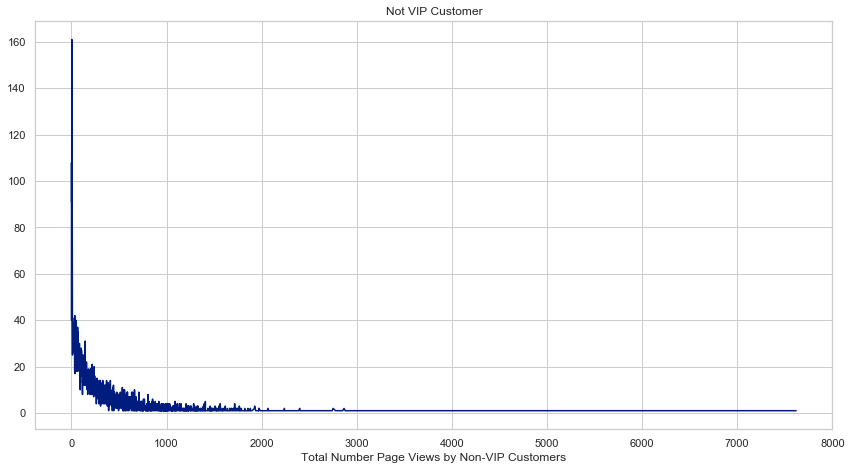

In [243]:
plt.subplot(1, 2, 1)
VIP_Customer['total_page_views'].value_counts().sort_index().plot.line(figsize=(5,5))
plt.title('VIP Customer')
plt.xlabel('Total Number Page Views by VIP Customers')
plt.ylabel('Count')
plt.show()


plt.subplot(1, 2, 1)
NotVIP_Customer['total_page_views'].value_counts().sort_index().plot.line(figsize=(28,7))
plt.title('Not VIP Customer')
plt.xlabel('Total Number Page Views by Non-VIP Customers')

plt.show()

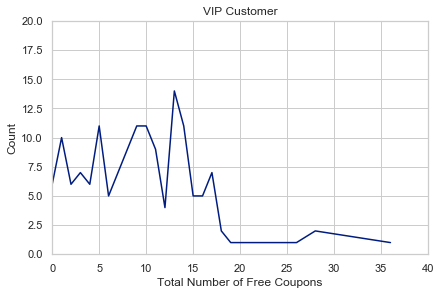

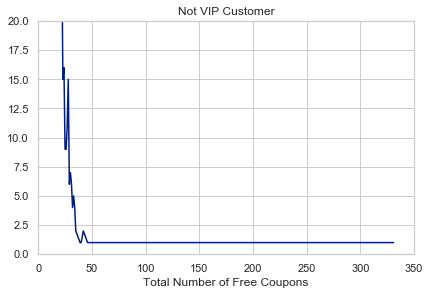

In [208]:
#Number of coupons vs VIP and Non VIP Customers

#plt.subplot(1, 2, 1)
Paid_Customer['total_free_coupon_got'].value_counts().sort_index().plot.line()
plt.title('VIP Customer')
plt.xlabel('Total Number of Free Coupons')
plt.ylabel('Count')
plt.ylim([0, 20])
plt.xlim([0, 40])
plt.show()

#plt.subplot(1, 2, 1)
Unpaid_Customer['total_free_coupon_got'].value_counts().sort_index().plot.line()
plt.title('Not VIP Customer')
plt.xlabel('Total Number of Free Coupons')
plt.ylim([0, 20])
plt.xlim([0, 350])
plt.show()


In [222]:
'''Dropping negative sign from 3 columns, here I am just dropping negative sign and not the number,
as I am assuming that negative sign came by a mistake, but number after the negative sign is valid.'''


#Removing negative sign from product_like_rate column, total_product_liked , and total_page_views

NotVIP_Customer.product_like_rate = NotVIP_Customer.product_like_rate.abs()
VIP_Customer.product_like_rate = VIP_Customer.product_like_rate.abs()


NotVIP_Customer.total_product_liked = NotVIP_Customer.total_product_liked.abs()
VIP_Customer.total_product_liked = VIP_Customer.total_product_liked.abs()

NotVIP_Customer.total_page_views = NotVIP_Customer.total_page_views.abs()
VIP_Customer.total_page_views = VIP_Customer.total_page_views.abs()

/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


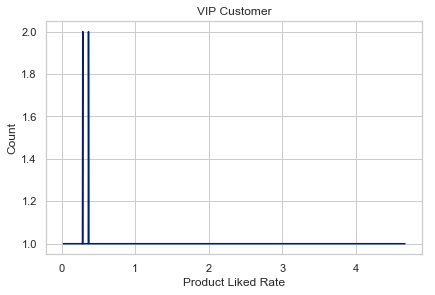

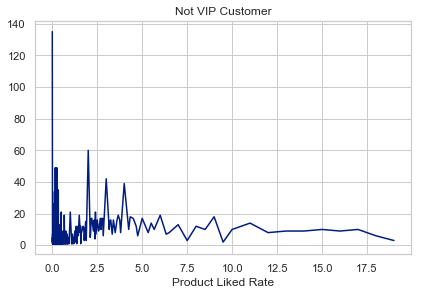

In [284]:
#Product Liked Rate of VIP vs Non VIP Customers

#VIP Customers
VIP_Customer['product_like_rate'].value_counts().sort_index().plot.line()
plt.title('VIP Customer')
plt.xlabel('Product Liked Rate')
plt.ylabel('Count')
plt.show()

#Non-VIP Customers
NotVIP_Customer['product_like_rate'].value_counts().sort_index().plot.line()
plt.title('Not VIP Customer')
plt.xlabel('Product Liked Rate')

plt.show()

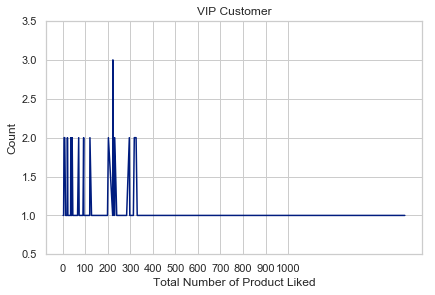

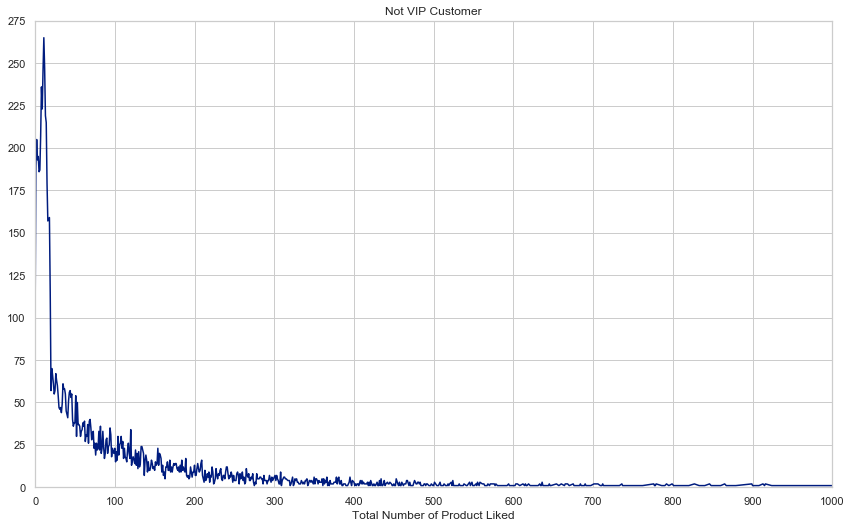

In [266]:
#Number of Product Liked:  VIP vs Non VIP Customers

#VIP Customers

VIP_Customer['total_product_liked'].value_counts().sort_index().plot.line()
plt.title('VIP Customer')
plt.xlabel('Total Number of Product Liked')
plt.ylabel('Count')
plt.ylim([0.5, 3.5])
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000]) 
plt.show()

#Non-VIP Customers
plt.subplot(1, 2, 1)
NotVIP_Customer['total_product_liked'].value_counts().sort_index().plot.line(figsize=(28,8))
plt.title('Not VIP Customer')
plt.xlabel('Total Number of Product Liked')
plt.ylim([0, 275])
plt.yticks([0,25,50,75,100,125,150,175,200,225,250,275]) 
plt.xlim([0, 1000])
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000]) 
plt.show()

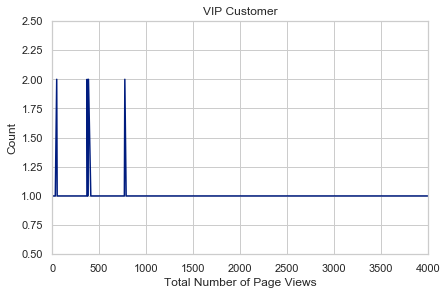

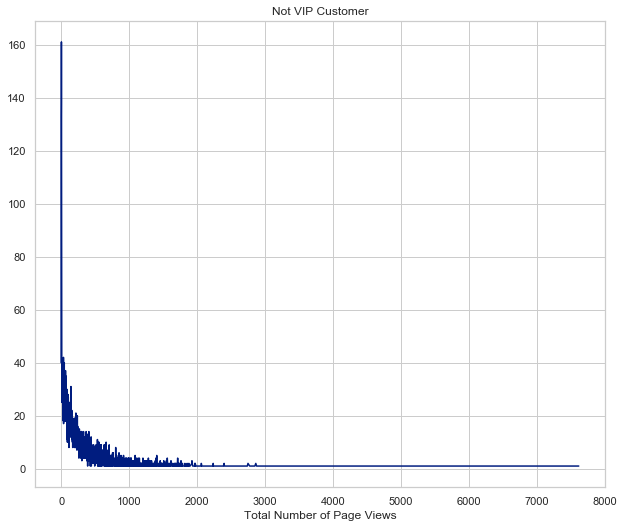

In [286]:
#Number of Product Liked:  VIP vs Non VIP Customers

#VIP Customers

VIP_Customer['total_page_views'].value_counts().sort_index().plot.line()
plt.title('VIP Customer')
plt.xlabel('Total Number of Page Views')
plt.ylabel('Count')
plt.ylim([0.5, 2.5])
plt.xlim([0, 2000])
plt.xticks([0,500,1000,1500,2000,2500,3000,3500,4000]) 
plt.show()

#Non-VIP Customers
plt.subplot(1, 2, 1)
NotVIP_Customer['total_page_views'].value_counts().sort_index().plot.line(figsize=(20,8))
plt.title('Not VIP Customer')
plt.xlabel('Total Number of Page Views')
 
plt.show()

##### 3. Is there any missing data in the dataset? If so, how to deal with it? What are the methods to deal with missing data?


In [290]:
df.isnull().sum()

#There are no null values in the dataset. 

IsVIP_500                         0
payment_7_day                     0
dau_days                          0
days_between_install_first_pay    0
total_txns_7_day                  0
total_page_views                  0
total_product_liked               0
product_like_rate                 0
total_free_coupon_got             0
total_bonus_xp_points             0
dtype: int64

##### 4. Is there any outlier in the data set? If so, how to deal with it? What are the methods to deal with outliers?

In [317]:
#Finding outliers on the basis of z-score

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
#print(z)
print(np.where(z > 3))

(array([  14,   14,   28, ..., 9979, 9983, 9983]), array([5, 6, 1, ..., 1, 5, 6]))


In [318]:
#Finding outliers on the basis of IQR 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

IsVIP_500                              0.000000
payment_7_day                         15.710000
dau_days                               4.000000
days_between_install_first_pay      1209.000000
total_txns_7_day                       1.000000
total_page_views                     422.000000
total_product_liked                  120.000000
product_like_rate                      0.174684
total_free_coupon_got                  9.000000
total_bonus_xp_points             996000.000000
dtype: float64


In [320]:
#We can also find number of oulier of particular column

df['x-Mean'] = abs(df['payment_7_day'] - df['payment_7_day'].mean())
df['1.96*std'] = 1.96*df['payment_7_day'].std()  
df['Outlier_payment_7_day'] = abs(df['payment_7_day'] - df['payment_7_day'].mean()) > 1.96*df['payment_7_day'].std()
df1= df['Outlier_payment_7_day'].value_counts()
print (df1)

False    9426
True      575
Name: Outlier_payment_7_day, dtype: int64


In [358]:
'''As we don't have domain knowldege to validate that whether the outliers are true value or error, hence for now we will
remove the rows having outliers.'''

from scipy import stats
import numpy as np

df_o = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print ("Number of rows and columnns before removing outliers", df.shape)
print ("Number of rows and columnns before removing outliers", df_o.shape)





Number of rows and columnns before removing outliers (10001, 10)
Number of rows and columnns before removing outliers (9021, 10)


##### 5.Show how to build the classifier and how you will evaluate the results? What is the metrics you will use?

In [409]:
#Precitors
X = df_o.drop('IsVIP_500',1)

#Target Variable
y = df_o['IsVIP_500']

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, stratify= y , random_state=66)
print (Y_train.unique())
print (Y_test.unique())

[0]
[0]


In [488]:
#Precitors
X = df.drop('IsVIP_500',1)

#Target Variable
y = df['IsVIP_500']

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=25)
#print (Y_train.nunique())
#print (Y_test.nunique())
print (Y_train.value_counts())
print (Y_test.value_counts())

0    6895
1     105
Name: IsVIP_500, dtype: int64
0    2951
1      50
Name: IsVIP_500, dtype: int64


In [489]:
#Classification Algorithms

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    #"AdaBoost": AdaBoostClassifier(),
    #"QDA": QuadraticDiscriminantAnalysis(),
    #"Gaussian Process": GaussianProcessClassifier()
}

In [501]:
#Random Forest

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.98      1.00      0.99      2951
        VIP       0.40      0.04      0.07        50

avg / total       0.97      0.98      0.98      3001



In [500]:
#Decision Tree

model_D = tree.DecisionTreeClassifier()
model_D.fit(X_train , Y_train)
y_pred = model_D.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.99      0.98      0.98      2951
        VIP       0.14      0.16      0.15        50

avg / total       0.97      0.97      0.97      3001



In [502]:
#Gradient Boosting Tree Classifier

model_GB = GradientBoostingClassifier(n_estimators=1000)
model_GB.fit(X_train , Y_train)
y_pred = model_GB.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.98      1.00      0.99      2951
        VIP       0.25      0.08      0.12        50

avg / total       0.97      0.98      0.98      3001



In [499]:
#K Nearest Neighbors Classifier

model_knn =KNeighborsClassifier()
model_knn.fit(X_train , Y_train)
y_pred = model_knn.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.98      1.00      0.99      2951
        VIP       0.00      0.00      0.00        50

avg / total       0.97      0.98      0.98      3001



/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [498]:
#Logistic Regression

model_logistic = LogisticRegression()
model_logistic.fit(X_train , Y_train)
y_pred = model_logistic.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.98      1.00      0.99      2951
        VIP       0.00      0.00      0.00        50

avg / total       0.97      0.98      0.97      3001



#### '''Best Algorithm Comes to be Decision Tree , reason might be because our data is imbalanced. 
#### Even the Decision Tree have very low f1-score for VIP class. Hence we need to overcome the problem of Imbalanced Data'''

### 7.Dealing with Imbalance Data and Model Improvments

#### Method 1: Up-sample Minority Class i.e. VIP Customers

In [471]:
from sklearn.utils import resample


# Separate majority and minority classes
df_majority = df[df.IsVIP_500==0]
df_minority = df[df.IsVIP_500==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5000,    # making minority class approx 50% of majority class
                                 random_state=123) # reproducible results
#print (df_minority_upsampled)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#print (df_upsampled)
 
# Display new class counts
print (df_upsampled.IsVIP_500.value_counts())

0    9846
1    5000
Name: IsVIP_500, dtype: int64


In [503]:
X = df_upsampled.drop('IsVIP_500',1)

#Target Variable
y = df_upsampled['IsVIP_500']

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=25)

In [504]:
#Decision Tree

model_D = tree.DecisionTreeClassifier()
model_D.fit(X_train , Y_train)
y_pred = model_D.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       1.00      0.98      0.99      2961
        VIP       0.97      1.00      0.98      1493

avg / total       0.99      0.99      0.99      4454



In [506]:
#Neural Network

clf_nn = MLPClassifier(alpha = 1, max_iter= 1000, solver = 'adam')
clf_nn.fit(X_train , Y_train)
y_pred = clf_nn.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.69      0.96      0.81      2961
        VIP       0.68      0.14      0.24      1493

avg / total       0.69      0.69      0.62      4454



In [507]:
#Logistic Regression

model_L = LogisticRegression()
model_L.fit(X_train , Y_train)
y_pred = model_L.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.83      0.71      0.76      2961
        VIP       0.55      0.71      0.62      1493

avg / total       0.74      0.71      0.72      4454



#### Method 2: DownSampling the Majority Class i.e. Non-VIP customer

In [509]:


# Separate majority and minority classes
df_majority = df[df.IsVIP_500==0]
df_minority = df[df.IsVIP_500==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples= 155,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.IsVIP_500.value_counts()

1    155
0    155
Name: IsVIP_500, dtype: int64

In [510]:
X = df_downsampled.drop('IsVIP_500',1)

#Target Variable
y = df_downsampled['IsVIP_500']

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state= 7)

In [511]:
#Decision Tree

model_D = tree.DecisionTreeClassifier()
model_D.fit(X_train , Y_train)
y_pred = model_D.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.78      0.74      0.76        47
        VIP       0.75      0.78      0.77        46

avg / total       0.76      0.76      0.76        93



In [512]:
#Logistic Regression

model_L = LogisticRegression()
model_L.fit(X_train , Y_train)
y_pred = model_L.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.65      0.36      0.47        47
        VIP       0.55      0.80      0.65        46

avg / total       0.60      0.58      0.56        93



In [514]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)
target_names = ['NON-VIP', 'VIP']
print(classification_report(Y_test, y_pred,target_names=target_names))

             precision    recall  f1-score   support

    NON-VIP       0.80      0.85      0.82        47
        VIP       0.84      0.78      0.81        46

avg / total       0.82      0.82      0.82        93



##### After DownSampling Best performing ML algorithm is Random Forest Classifier with F1 score: for NON-VIP as 0.82 
##### and for VIP as 0.81